<a href="https://colab.research.google.com/github/Jeba-Maliha/Cyber-Security-Projects/blob/main/ddos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df = pd.read_csv('dataset_sdn.csv')





In [ ]:
df.head(5)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
Label_counts = df['label'].value_counts()

print(Label_counts)

label
0    63561
1    40784
Name: count, dtype: int64


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)


dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64


In [ ]:
df = df.dropna()


In [ ]:
object_column_names = df.select_dtypes(include=['object']).columns.tolist()
print("Object columns:", object_column_names)


Object columns: ['src', 'dst', 'Protocol']


In [ ]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode specified columns
for col in ['src', 'dst', 'Protocol']:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
import pandas as pd


data = df.drop(columns=['label'])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


outlier_condition = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))


outliers = data[outlier_condition]
print(outliers)


        dt  switch  src  dst  pktcount  bytecount  dur  dur_nsec  tot_dur  \
0      NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
1      NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
2      NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
3      NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
4      NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
...     ..     ...  ...  ...       ...        ...  ...       ...      ...   
104340 NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
104341 NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
104342 NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
104343 NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   
104344 NaN     NaN  NaN  NaN       NaN        NaN  NaN       NaN      NaN   

        flows  ...  byteperflow  pktrate  Pairflow  Protocol  port_no  \
0 

In [ ]:
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,14,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,1,15209,12720,1,1.0,2.0,0
104341,5262,3,14,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,3,15099,14693,1,1.0,2.0,0
104342,5262,3,2,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,2,3409,3731,0,0.0,0.0,0
104343,5262,3,2,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,1,15209,12720,1,1.0,2.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler


data = df.drop(columns=['label'], errors='ignore')

scaler = StandardScaler()
df[data.columns] = scaler.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
Label_counts = train_df['label'].value_counts()

print(Label_counts)

label
0    50722
1    32349
Name: count, dtype: int64


In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


X_train = train_df.drop(columns=['label'])
y_train = train_df['label']



def train_and_evaluate(model, X_train, y_train, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_accuracy = model.score(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = model.predict(X_train)


    report = classification_report(y_train, y_train_pred)

    print(f'{model_name} Training Accuracy: {training_accuracy:.4f}, Training Time: {training_time:.4f} seconds')
    print(f'{model_name} Classification Report:\n{report}')


clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(clf_rf, X_train, y_train, 'Random Forest')


clf_svc = SVC(kernel='rbf', C=1.0, random_state=42)
train_and_evaluate(clf_svc, X_train, y_train, 'Support Vector Classifier')


clf_knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(clf_knn, X_train, y_train, 'K-Nearest Neighbors (KNN)')


clf_mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42)
train_and_evaluate(clf_mlp, X_train, y_train, 'Multi-layer Perceptron (MLP)')


clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate(clf_xgb, X_train, y_train, 'XGBoost Classifier')


Random Forest Training Accuracy: 1.0000, Training Time: 11.1246 seconds
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50722
           1       1.00      1.00      1.00     32349

    accuracy                           1.00     83071
   macro avg       1.00      1.00      1.00     83071
weighted avg       1.00      1.00      1.00     83071

Support Vector Classifier Training Accuracy: 0.9784, Training Time: 148.1772 seconds
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     50722
           1       0.96      0.98      0.97     32349

    accuracy                           0.98     83071
   macro avg       0.98      0.98      0.98     83071
weighted avg       0.98      0.98      0.98     83071

K-Nearest Neighbors (KNN) Training Accuracy: 0.9851, Training Time: 53.4714 seconds
K-Nearest Neighbors

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:20:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Training Accuracy: 1.0000, Training Time: 1.3750 seconds
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50722
           1       1.00      1.00      1.00     32349

    accuracy                           1.00     83071
   macro avg       1.00      1.00      1.00     83071
weighted avg       1.00      1.00      1.00     83071



In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score


X_test = test_df.drop(columns=['label'])
y_test = test_df['label']


def evaluate_on_test(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:

        y_prob = model.decision_function(X_test)


    test_accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} AUC: {auc:.4f}\n')

evaluate_on_test(clf_rf, X_test, y_test, 'Random Forest')
evaluate_on_test(clf_svc, X_test, y_test, 'Support Vector Classifier')
evaluate_on_test(clf_knn, X_test, y_test, 'K-Nearest Neighbors (KNN)')
evaluate_on_test(clf_mlp, X_test, y_test, 'Multi-layer Perceptron (MLP)')
evaluate_on_test(clf_xgb, X_test, y_test, 'XGBoost Classifier')


Random Forest Test Accuracy: 1.0000
Random Forest AUC: 1.0000

Support Vector Classifier Test Accuracy: 0.9765
Support Vector Classifier AUC: 0.9972

K-Nearest Neighbors (KNN) Test Accuracy: 0.9767
K-Nearest Neighbors (KNN) AUC: 0.9953

Multi-layer Perceptron (MLP) Test Accuracy: 0.9982
Multi-layer Perceptron (MLP) AUC: 1.0000

XGBoost Classifier Test Accuracy: 1.0000
XGBoost Classifier AUC: 1.0000



In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import numpy as np


X = train_df.drop(columns=['label'])
y= train_df['label']

def train_and_evaluate_cv(model, X, y, model_name):
    start_time = time.time()

    cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')


    mean_cv = np.mean(cv_scores)
    std_cv = np.std(cv_scores)

    print(f'{model_name} Cross-Validation Accuracies: {cv_scores}')
    print(f'{model_name} Mean CV Accuracy: {mean_cv:.4f}, Standard Deviation: {std_cv:.4f}')
    print(f'Training Time: {time.time() - start_time:.4f} seconds\n')


clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_cv(clf_rf, X, y, 'Random Forest')


clf_svc = SVC(kernel='rbf', C=1.0, random_state=42)
train_and_evaluate_cv(clf_svc, X, y, 'Support Vector Classifier')


clf_knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_cv(clf_knn, X, y, 'K-Nearest Neighbors (KNN)')


clf_mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42)
train_and_evaluate_cv(clf_mlp, X, y, 'Multi-layer Perceptron (MLP)')


clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_cv(clf_xgb, X, y, 'XGBoost Classifier')


Random Forest Cross-Validation Accuracies: [1.         1.         1.         1.         0.99987962 1.
 1.         1.         1.         1.        ]
Random Forest Mean CV Accuracy: 1.0000, Standard Deviation: 0.0000
Training Time: 99.0964 seconds

Support Vector Classifier Cross-Validation Accuracies: [0.97291767 0.9772481  0.9772481  0.97592392 0.97580354 0.97628506
 0.97616468 0.97496088 0.97785001 0.97375707]
Support Vector Classifier Mean CV Accuracy: 0.9758, Standard Deviation: 0.0015
Training Time: 819.3094 seconds

K-Nearest Neighbors (KNN) Cross-Validation Accuracies: [0.97713048 0.97387745 0.97688696 0.97809077 0.97676658 0.97327555
 0.97700734 0.97676658 0.97772963 0.97423859]
K-Nearest Neighbors (KNN) Mean CV Accuracy: 0.9762, Standard Deviation: 0.0016
Training Time: 47.4123 seconds

Multi-layer Perceptron (MLP) Cross-Validation Accuracies: [0.99759268 0.9987962  0.99855544 0.99867582 0.99855544 0.99819429
 0.9987962  0.9993981  0.99819429 0.99807391]
Multi-layer Perceptron 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:43:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Classifier Cross-Validation Accuracies: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
XGBoost Classifier Mean CV Accuracy: 1.0000, Standard Deviation: 0.0000
Training Time: 13.0086 seconds



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:46:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


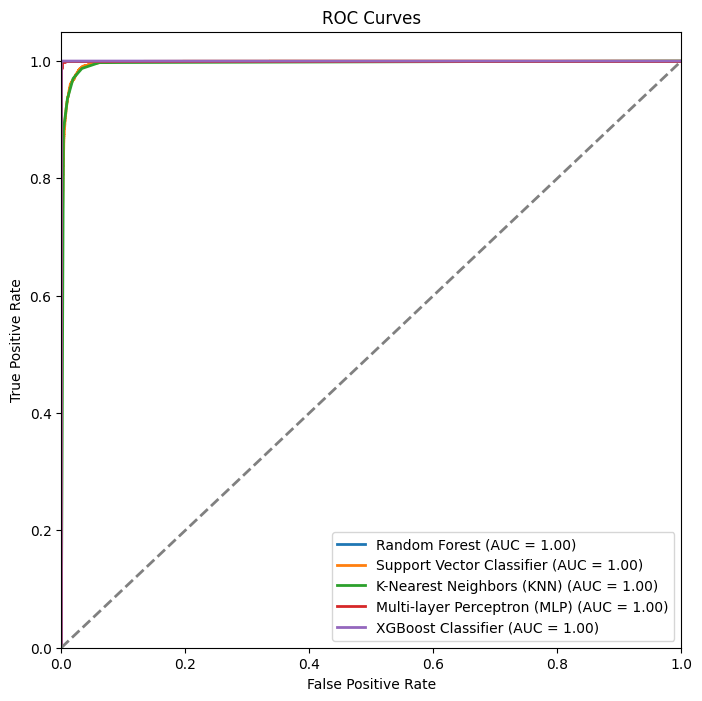

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:49:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


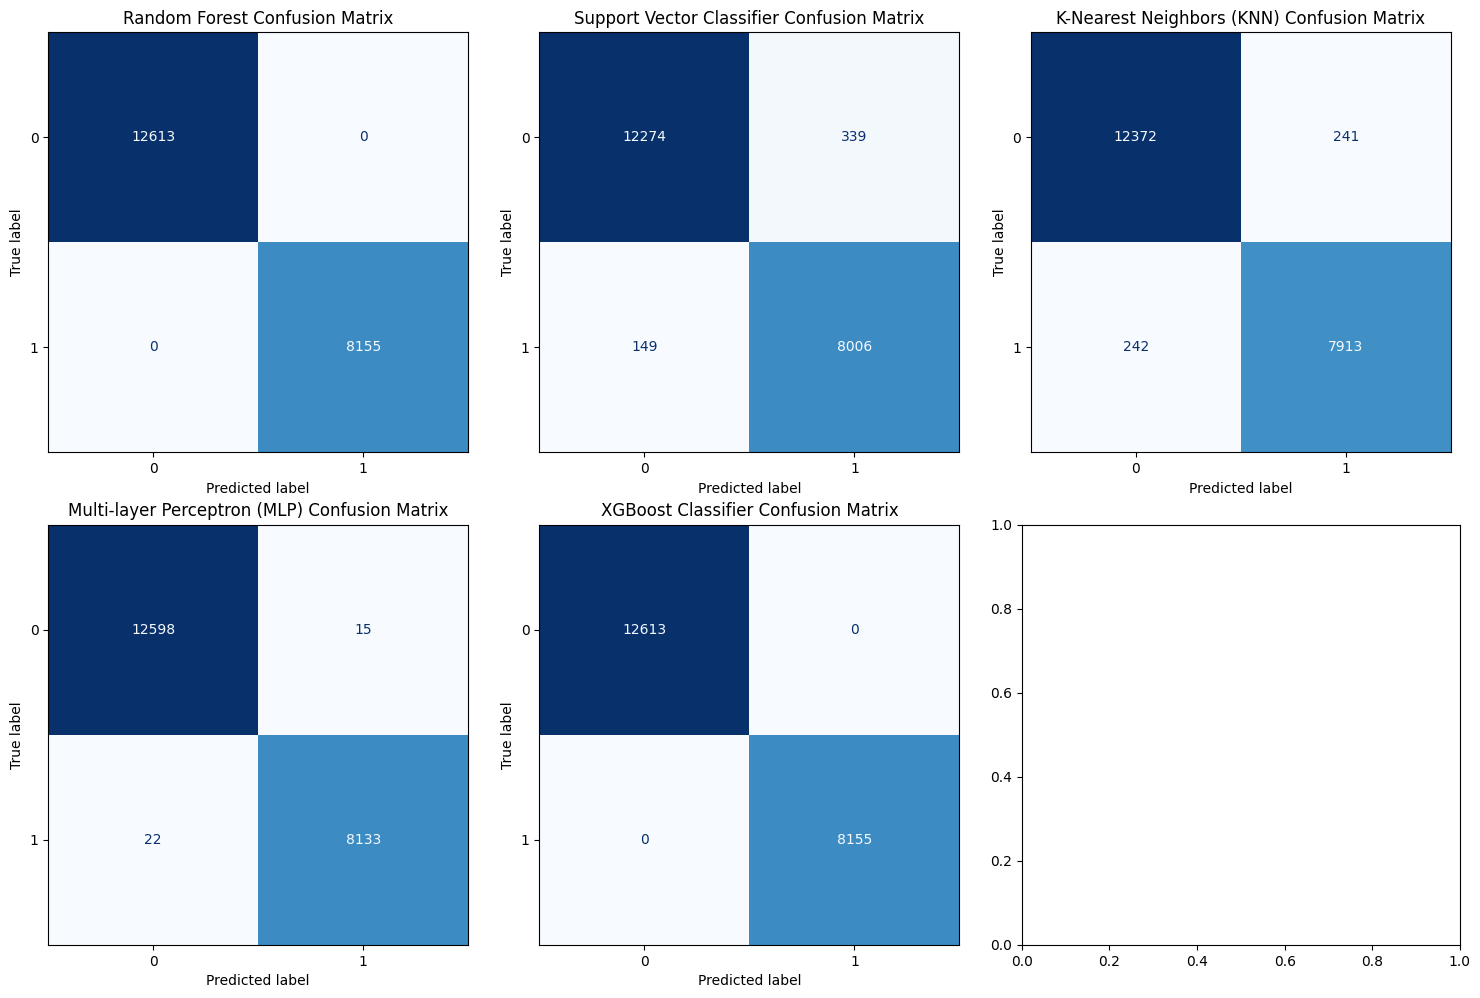

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay


X_test = test_df.drop(columns=['label'])
y_test = test_df['label']


def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)


    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = model.decision_function(X_test)


    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    return fpr, tpr, roc_auc, cm


def plot_roc_curves(models, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(8, 8))

    for model_name, model in models.items():
        fpr, tpr, roc_auc, _ = evaluate_model(model, X_train, y_train, X_test, y_test)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()


def plot_confusion_matrices(models, X_train, y_train, X_test, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    for i, (model_name, model) in enumerate(models.items()):
        _, _, _, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
        axes[i].set_title(f'{model_name} Confusion Matrix')

    plt.tight_layout()
    plt.show()


models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(kernel='rbf', C=1.0, random_state=42),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5),
    'Multi-layer Perceptron (MLP)': MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

plot_roc_curves(models, X_train, y_train, X_test, y_test)


plot_confusion_matrices(models, X_train, y_train, X_test, y_test)


In [ ]:
from imblearn.over_sampling import SMOTE


X = train_df.drop(columns=['label'])
y = train_df['label']


smote = SMOTE(random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)

modified_df = pd.DataFrame(X_resampled, columns=X.columns)
modified_df['label'] = y_resampled

print(modified_df['label'].value_counts())


label
1    50722
0    50722
Name: count, dtype: int64


**balance**

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


X_train = modified_df.drop(columns=['label'])
y_train = modified_df['label']



def train_and_evaluate(model, X_train, y_train, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_accuracy = model.score(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = model.predict(X_train)


    report = classification_report(y_train, y_train_pred)

    print(f'{model_name} Training Accuracy: {training_accuracy:.4f}, Training Time: {training_time:.4f} seconds')
    print(f'{model_name} Classification Report:\n{report}')


clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(clf_rf, X_train, y_train, 'Random Forest')


clf_svc = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
train_and_evaluate(clf_svc, X_train, y_train, 'Support Vector Classifier')


clf_knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(clf_knn, X_train, y_train, 'K-Nearest Neighbors (KNN)')


clf_mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42)
train_and_evaluate(clf_mlp, X_train, y_train, 'Multi-layer Perceptron (MLP)')

# 5. XGBoost Classifier
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate(clf_xgb, X_train, y_train, 'XGBoost Classifier')


Random Forest Training Accuracy: 1.0000, Training Time: 17.7561 seconds
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50722
           1       1.00      1.00      1.00     50722

    accuracy                           1.00    101444
   macro avg       1.00      1.00      1.00    101444
weighted avg       1.00      1.00      1.00    101444

Support Vector Classifier Training Accuracy: 0.9799, Training Time: 1010.2007 seconds
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     50722
           1       0.97      0.99      0.98     50722

    accuracy                           0.98    101444
   macro avg       0.98      0.98      0.98    101444
weighted avg       0.98      0.98      0.98    101444

K-Nearest Neighbors (KNN) Training Accuracy: 0.9882, Training Time: 75.9248 seconds
K-Nearest Neighbor

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:11:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Training Accuracy: 1.0000, Training Time: 1.5856 seconds
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50722
           1       1.00      1.00      1.00     50722

    accuracy                           1.00    101444
   macro avg       1.00      1.00      1.00    101444
weighted avg       1.00      1.00      1.00    101444



In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# Function to evaluate the model on test data
def evaluate_on_test(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # If the model has predict_proba (for AUC)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For SVC, we use decision_function if predict_proba is not available
        y_prob = model.decision_function(X_test)

    # Calculate accuracy and AUC
    test_accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} AUC: {auc:.4f}\n')

# Evaluate models on test data
evaluate_on_test(clf_rf, X_test, y_test, 'Random Forest')
evaluate_on_test(clf_svc, X_test, y_test, 'Support Vector Classifier')
evaluate_on_test(clf_knn, X_test, y_test, 'K-Nearest Neighbors (KNN)')
evaluate_on_test(clf_mlp, X_test, y_test, 'Multi-layer Perceptron (MLP)')
evaluate_on_test(clf_xgb, X_test, y_test, 'XGBoost Classifier')


Random Forest Test Accuracy: 1.0000
Random Forest AUC: 1.0000

Support Vector Classifier Test Accuracy: 0.9747
Support Vector Classifier AUC: 0.9971

K-Nearest Neighbors (KNN) Test Accuracy: 0.9778
K-Nearest Neighbors (KNN) AUC: 0.9937

Multi-layer Perceptron (MLP) Test Accuracy: 0.9991
Multi-layer Perceptron (MLP) AUC: 1.0000

XGBoost Classifier Test Accuracy: 1.0000
XGBoost Classifier AUC: 1.0000



In [ ]:
import time
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    cohen_kappa_score,
    matthews_corrcoef,
    brier_score_loss
)

def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    training_accuracy = model.score(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    report = classification_report(y_test, y_test_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate Kappa score
    kappa = cohen_kappa_score(y_test, y_test_pred)

    # Calculate Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_test_pred)

    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
        brier = brier_score_loss(y_test, y_test_prob)
    else:
        brier = None

    print(f'{model_name} Training Accuracy: {training_accuracy:.4f}, Training Time: {training_time:.4f} seconds')
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}')
    print(f'{model_name} Classification Report:\n{report}')
    print(f'{model_name} Cohen\'s Kappa: {kappa:.4f}')
    print(f'{model_name} Matthews Correlation Coefficient (MCC): {mcc:.4f}')
    if brier is not None:
        print(f'{model_name} Brier Score: {brier:.4f}\n')
    else:
        print(f'{model_name} Brier Score cannot be calculated (predict_proba not available).\n')


clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(clf_rf, X_train, y_train, X_test, y_test, 'Random Forest')

clf_svc = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
train_and_evaluate(clf_svc, X_train, y_train, X_test, y_test, 'Support Vector Classifier')

clf_knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(clf_knn, X_train, y_train, X_test, y_test, 'K-Nearest Neighbors (KNN)')

clf_mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42)
train_and_evaluate(clf_mlp, X_train, y_train, X_test, y_test, 'Multi-layer Perceptron (MLP)')

clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate(clf_xgb, X_train, y_train, X_test, y_test, 'XGBoost Classifier')


Random Forest Training Accuracy: 1.0000, Training Time: 31.7189 seconds
Random Forest Test Accuracy: 1.0000
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12613
           1       1.00      1.00      1.00      8155

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768

Random Forest Cohen's Kappa: 1.0000
Random Forest Matthews Correlation Coefficient (MCC): 1.0000
Random Forest Brier Score: 0.0001

Support Vector Classifier Training Accuracy: 0.9799, Training Time: 1136.4015 seconds
Support Vector Classifier Test Accuracy: 0.9747
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     12613
           1       0.95      0.99      0.97      8155

    accuracy                           0.97     2

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:08:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Training Accuracy: 1.0000, Training Time: 1.6141 seconds
XGBoost Classifier Test Accuracy: 1.0000
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12613
           1       1.00      1.00      1.00      8155

    accuracy                           1.00     20768
   macro avg       1.00      1.00      1.00     20768
weighted avg       1.00      1.00      1.00     20768

XGBoost Classifier Cohen's Kappa: 1.0000
XGBoost Classifier Matthews Correlation Coefficient (MCC): 1.0000
XGBoost Classifier Brier Score: 0.0000



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:16:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


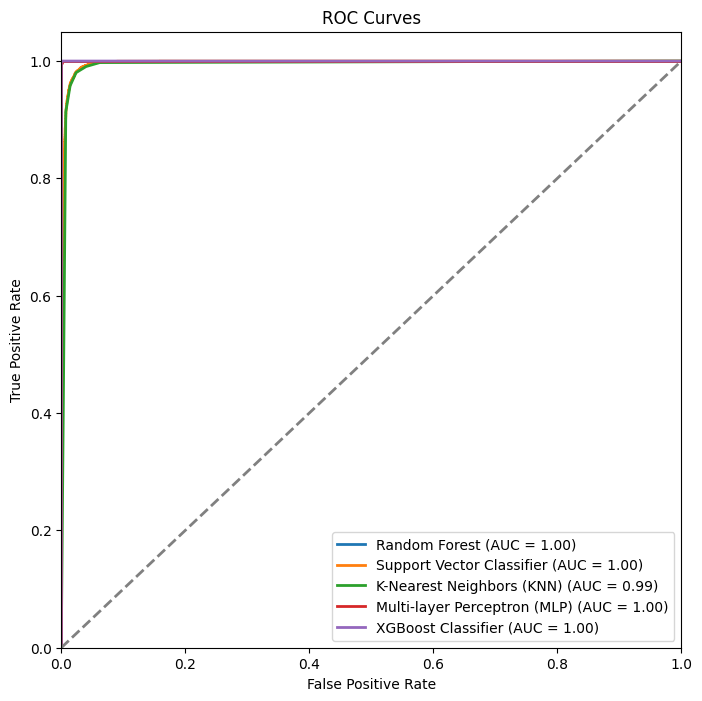

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:20:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


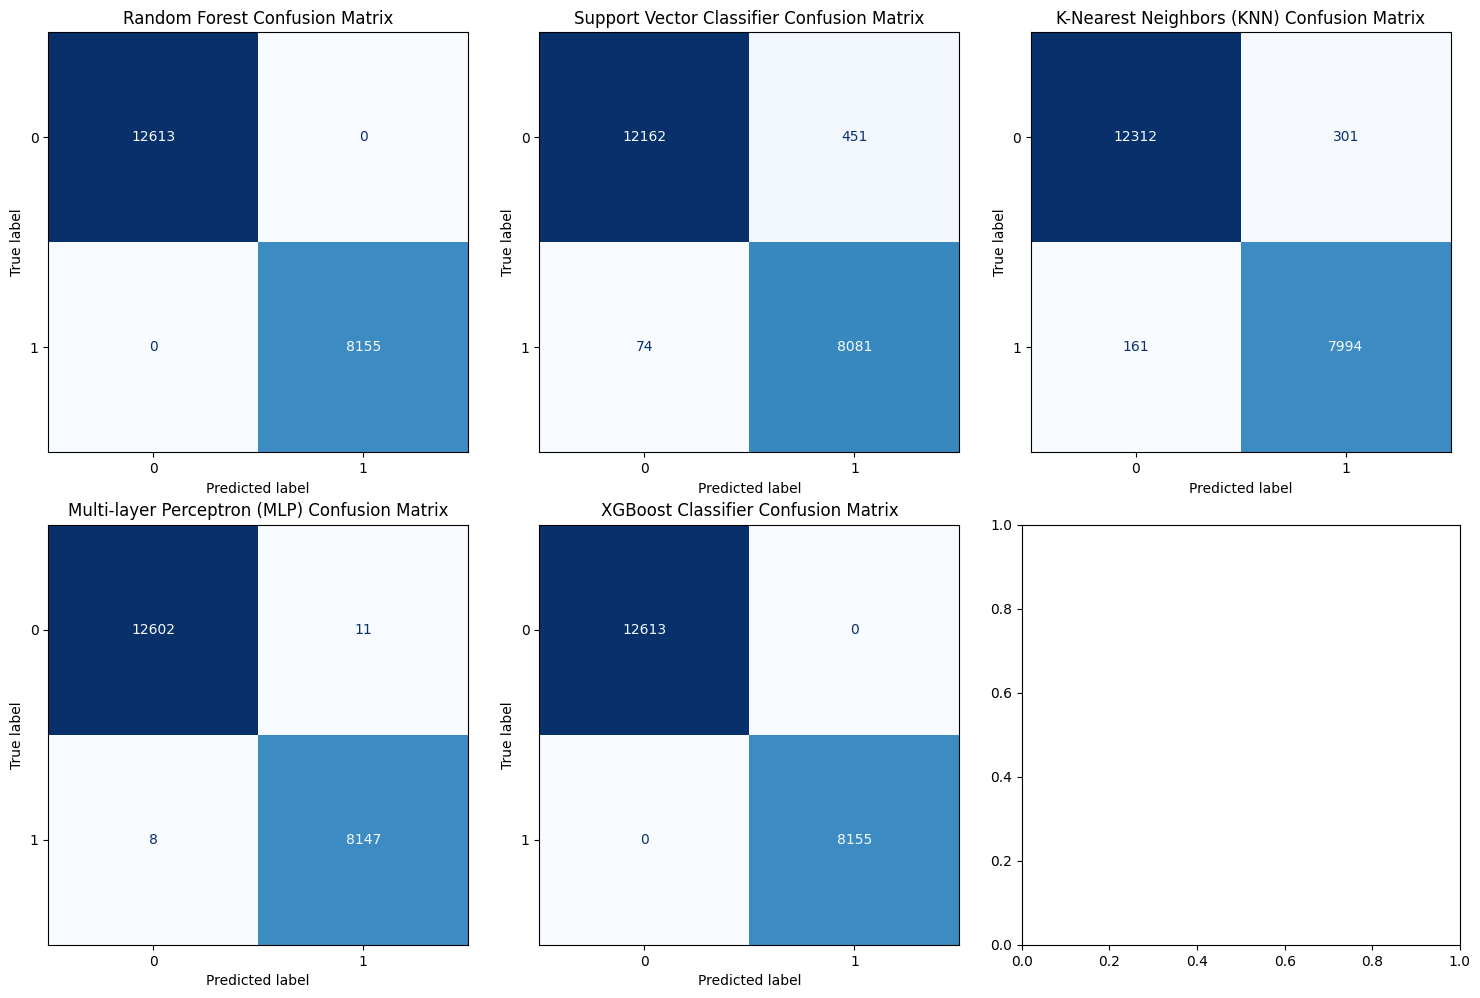

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Splitting test_df into features and labels
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# Function to collect ROC data and confusion matrices
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # For ROC curve
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]  # For binary classification
    else:
        y_test_prob = model.decision_function(X_test)  # For models like SVM

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)

    # Predict labels for confusion matrix
    y_test_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_test_pred)

    return fpr, tpr, roc_auc, cm

# Plot all ROC curves in a single plot
def plot_roc_curves(models, X_train, y_train, X_test, y_test):
    plt.figure(figsize=(8, 8))

    for model_name, model in models.items():
        fpr, tpr, roc_auc, _ = evaluate_model(model, X_train, y_train, X_test, y_test)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

# Plot confusion matrices in subplots
def plot_confusion_matrices(models, X_train, y_train, X_test, y_test):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust subplot grid as necessary
    axes = axes.ravel()  # Flatten the 2D array of axes

    for i, (model_name, model) in enumerate(models.items()):
        _, _, _, cm = evaluate_model(model, X_train, y_train, X_test, y_test)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
        axes[i].set_title(f'{model_name} Confusion Matrix')

    plt.tight_layout()
    plt.show()

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Classifier': SVC(kernel='rbf', C=1.0, random_state=42),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(n_neighbors=5),
    'Multi-layer Perceptron (MLP)': MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Plot all ROC curves
plot_roc_curves(models, X_train, y_train, X_test, y_test)

# Plot all confusion matrices
plot_confusion_matrices(models, X_train, y_train, X_test, y_test)


In [ ]:
import pandas as pd
import time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import numpy as np

X_train = modified_df.drop(columns=['label'])
y_train = modified_df['label']

def train_and_evaluate_cv(model, X_train, y_train, model_name):
    start_time = time.time()

    # Perform 10-fold cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

    # Calculate mean and standard deviation
    mean_cv = np.mean(cv_scores)
    std_cv = np.std(cv_scores)

    training_time = time.time() - start_time

    print(f'{model_name} Mean CV Accuracy: {mean_cv:.4f}, Standard Deviation: {std_cv:.4f}, Training Time: {training_time:.4f} seconds')
    print(f'{model_name} Cross-Validation Scores: {cv_scores}\n')

# 1. Random Forest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_cv(clf_rf, X_train, y_train, 'Random Forest')

# 2. Support Vector Classifier
clf_svc = SVC(kernel='rbf', C=1.0, random_state=42)
train_and_evaluate_cv(clf_svc, X_train, y_train, 'Support Vector Classifier')

# 3. K-Nearest Neighbors (KNN)
clf_knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate_cv(clf_knn, X_train, y_train, 'K-Nearest Neighbors (KNN)')

# 4. Multi-layer Perceptron (MLP)
clf_mlp = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=10000, random_state=42)
train_and_evaluate_cv(clf_mlp, X_train, y_train, 'Multi-layer Perceptron (MLP)')

# 5. XGBoost Classifier
clf_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_and_evaluate_cv(clf_xgb, X_train, y_train, 'XGBoost Classifier')


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    confusion_matrix,
    accuracy_score,
    matthews_corrcoef,
    cohen_kappa_score
)


X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

    # AUC
    auc = roc_auc_score(y_test, y_prob)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Matthews Correlation Coefficient (MCC)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Cohen's Kappa Score
    kappa = cohen_kappa_score(y_test, y_pred)

    return auc, fpr, tpr, precision, recall, cm, mcc, kappa

# Evaluate each model
models = {
    'Random Forest': clf_rf,
    'Support Vector Classifier': clf_svc,
    'K-Nearest Neighbors (KNN)': clf_knn,
    'Multi-layer Perceptron (MLP)': clf_mlp,
    'XGBoost Classifier': clf_xgb
}

# Fit each model before evaluation
for model_name, model in models.items():
    print(f"Fitting {model_name}...")
    model.fit(X_train, y_train)  # Fit the model to the training data

# Now evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    auc, fpr, tpr, precision, recall, cm, mcc, kappa = evaluate_model(model, X_test, y_test)

    # Print metrics
    print(f'{model_name} AUC: {auc:.4f}')
    print(f'{model_name} MCC: {mcc:.4f}')
    print(f'{model_name} Kappa Score: {kappa:.4f}')
    print(f'{model_name} Confusion Matrix:\n{cm}\n')

    # Plot ROC Curve
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # Plot Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision)
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

# Store metrics for each model
metrics = {
    'Model': [],
    'Macro Precision': [],
    'Weighted Precision': [],
    'Macro Recall': [],
    'Weighted Recall': [],
    'Macro F1-Score': [],
    'Weighted F1-Score': []
}

def store_metrics(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics['Model'].append(model_name)
    metrics['Macro Precision'].append(report['macro avg']['precision'])
    metrics['Weighted Precision'].append(report['weighted avg']['precision'])
    metrics['Macro Recall'].append(report['macro avg']['recall'])
    metrics['Weighted Recall'].append(report['weighted avg']['recall'])
    metrics['Macro F1-Score'].append(report['macro avg']['f1-score'])
    metrics['Weighted F1-Score'].append(report['weighted avg']['f1-score'])

# Evaluate and store metrics for each model
for model_name, model in [
    ('Random Forest', clf_rf),
    ('Support Vector Classifier', clf_svc),
    ('K-Nearest Neighbors (KNN)', clf_knn),
    ('Multi-layer Perceptron (MLP)', clf_mlp),
    ('XGBoost Classifier', clf_xgb)
]:
    model.fit(X_train, y_train)  # Fit the model first
    y_train_pred = model.predict(X_train)
    store_metrics(y_train, y_train_pred, model_name)

# Convert metrics to DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Plotting
x = np.arange(len(metrics_df['Model']))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Adding bars for macro and weighted averages
ax.bar(x - width, metrics_df['Macro Precision'], width, label='Macro Precision')
ax.bar(x, metrics_df['Weighted Precision'], width, label='Weighted Precision')
ax.bar(x + width, metrics_df['Macro Recall'], width, label='Macro Recall')
ax.bar(x + 2 * width, metrics_df['Weighted Recall'], width, label='Weighted Recall')
ax.bar(x + 3 * width, metrics_df['Macro F1-Score'], width, label='Macro F1-Score')
ax.bar(x + 4 * width, metrics_df['Weighted F1-Score'], width, label='Weighted F1-Score')

# Adding labels, title, and custom x-axis tick labels
ax.set_xlabel('Models')
ax.set_title('Macro vs Weighted Averages')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metrics_df['Model'])
ax.legend()

plt.tight_layout()
plt.show()
